In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\JN\mymoviedb.csv\mymoviedb.csv', lineterminator='\n')

<>:1: SyntaxWarning: invalid escape sequence '\J'
<>:1: SyntaxWarning: invalid escape sequence '\J'
C:\Users\Baraa\AppData\Local\Temp\ipykernel_3016\98428208.py:1: SyntaxWarning: invalid escape sequence '\J'
  df = pd.read_csv('F:\JN\mymoviedb.csv\mymoviedb.csv', lineterminator='\n')


In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [20]:
df.shape

(9827, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [22]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.isna().sum()


Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [25]:
def Outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q1 + 1.5 * iqr  
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] 
    return outliers

In [26]:
for col in df.select_dtypes(include=np.number).columns:
    percent = len(Outliers(df, col)) / len(df) * 100
    print("{:<15} {:>6.2f}".format(col, percent))

Popularity       17.82
Vote_Count       18.32
Vote_Average     11.74


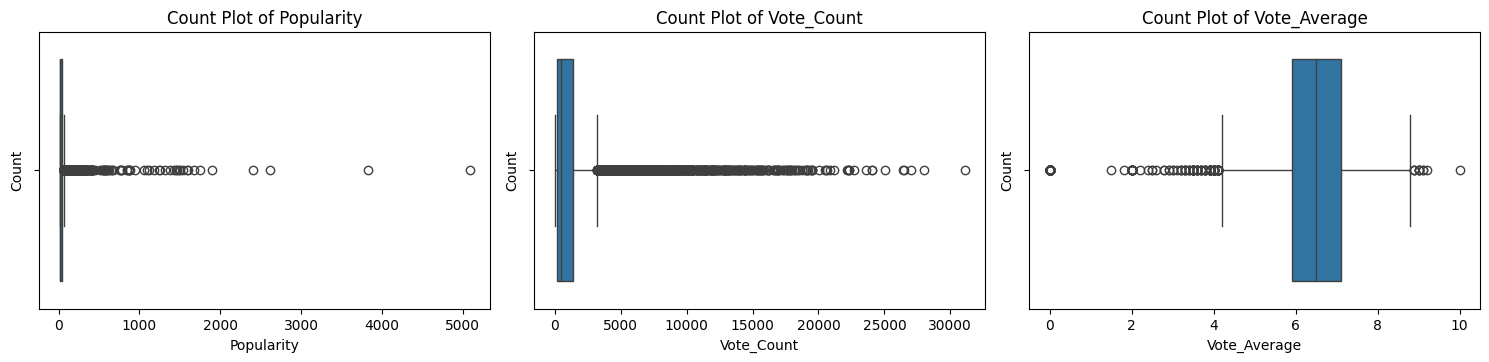

In [27]:
columns_of_interest = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))  

for i, col in enumerate(columns_of_interest):
    plt.subplot(3, 3, i + 1)  
    sns.boxplot(x=df[col])  
    plt.title(f'Count Plot of {col}')  
    plt.xlabel(col)  
    plt.ylabel('Count')  

plt.tight_layout()  
plt.show()  

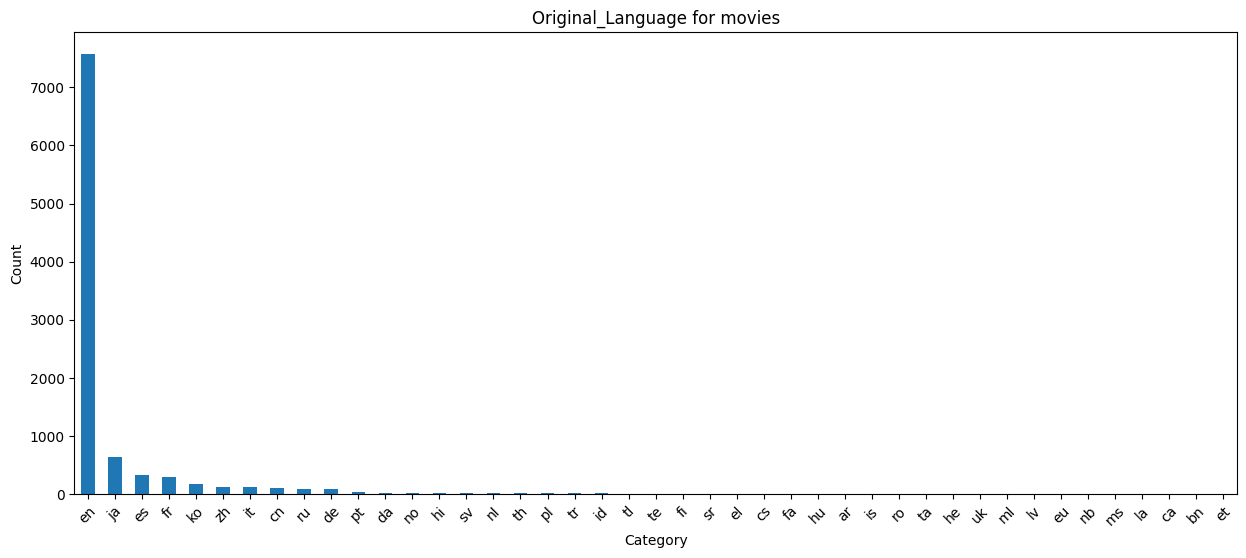

In [28]:
plt.figure(figsize=(15, 6))
df['Original_Language'].value_counts().plot(kind='bar')
plt.title('Original_Language for movies')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [29]:
df['Title'].unique()

array(['Spider-Man: No Way Home', 'The Batman', 'No Exit', ...,
       'The Offering', 'The United States vs. Billie Holiday', 'Threads'],
      dtype=object)

In [34]:
df['Title'].value_counts()

Title
Beauty and the Beast          4
Alice in Wonderland           4
Batman                        3
Inferno                       3
The Call                      3
                             ..
Alexander the Great           1
Arctic Predator               1
For Love of the Game          1
The 9th Life of Louis Drax    1
Encanto                       1
Name: count, Length: 9513, dtype: int64

C:\Users\Baraa\AppData\Local\Temp\ipykernel_17100\989141653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Title', data=top_movies, palette='viridis')


Text(0, 0.5, 'Movie Title')

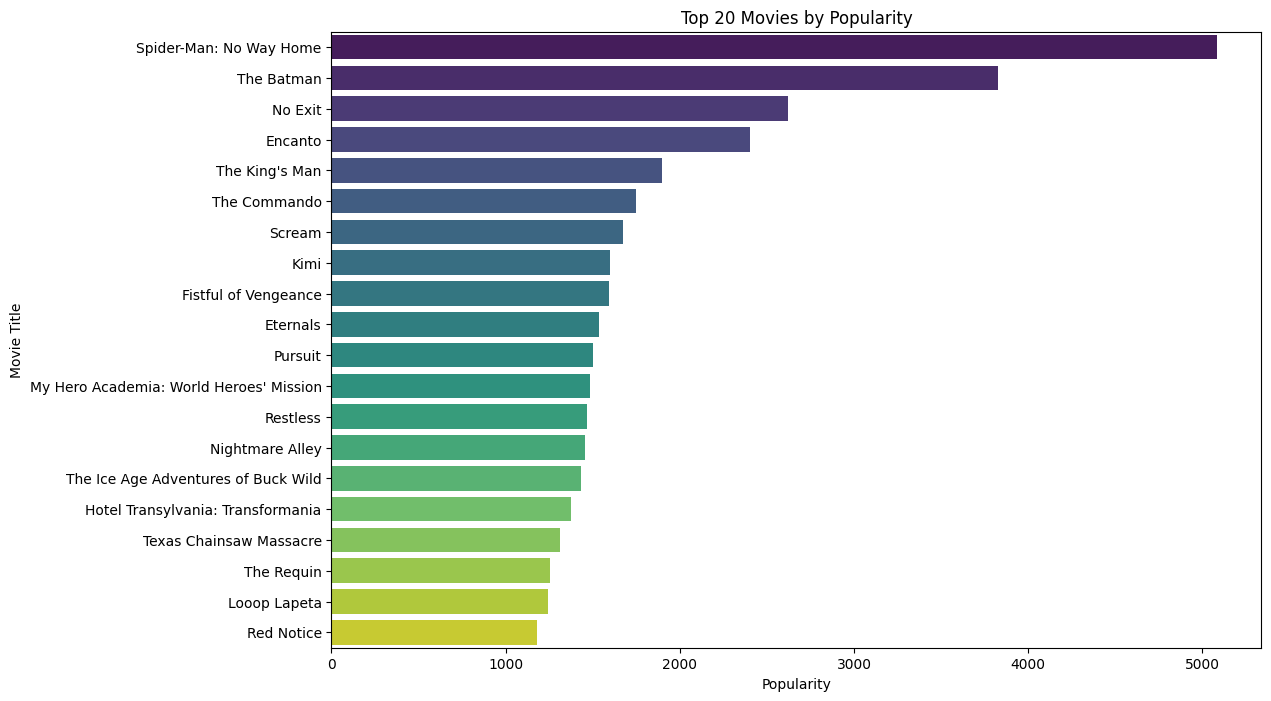

In [4]:
top_movies = df.sort_values(by='Popularity', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Popularity', y='Title', data=top_movies, palette='viridis')
plt.title('Top 20 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')

In [11]:
df['Year'] = pd.to_datetime(df['Release_Date']).dt.year

In [10]:
most_films_year = df['Year'].value_counts().idxmax()

In [12]:
most_films_year

np.int32(2021)

The most common genre is 'Drama' with 3744 occurrences.


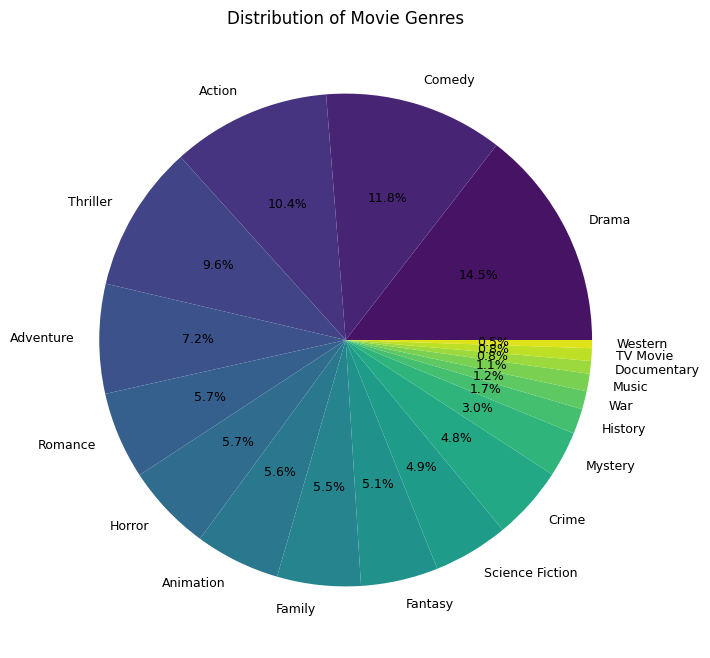

In [24]:
all_genres = df['Genre'].str.split(', ').explode()
genre_count = all_genres.value_counts()
plt.figure(figsize=(10, 8))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%',
        colors=sns.color_palette('viridis', n_colors=len(genre_count)), textprops={'fontsize': 9})
plt.title('Distribution of Movie Genres')
all_genres = df['Genre'].str.split(', ').explode()
genre_count = all_genres.value_counts()
most_common_genre = genre_count.idxmax()
most_common_count = genre_count.max()
print(f"The most common genre is '{most_common_genre}' with {most_common_count} occurrences.")
